In [1]:
# import numpy as np
# import pandas as pd
# # from sklearn.linear_model import LinearRegressioninear
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
# from sklearn.stats.models.stats.outliers_influence import variance_inflation_factor



In [2]:

# from sklearn.linear_model import LinearRegressioninear

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import pickle 
import json 

In [4]:
df=pd.read_csv("medical_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [37]:
# EDA

In [38]:
df["sex"].value_counts().to_dict()

{'male': 676, 'female': 662}

In [39]:
df["sex"].replace({'male': 1, 'female':0},inplace=True)

In [40]:
sex_value={'male': 1, 'female':0}
sex_value["male"]

1

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


In [42]:
df["smoker"].value_counts().to_dict()

{'no': 1064, 'yes': 274}

In [43]:
df["smoker"].replace({'no': 0, 'yes': 1},inplace=True)

In [44]:
df["smoker"].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [45]:
smoker_value={'no': 0, 'yes': 1}
smoker_value["no"]

0

In [46]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [47]:
# df=pd.get_dummies(df,columns=["region"])
df=pd.get_dummies(df,columns=['region'])


In [48]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


In [51]:
# linearity 

In [52]:
df.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


<AxesSubplot:>

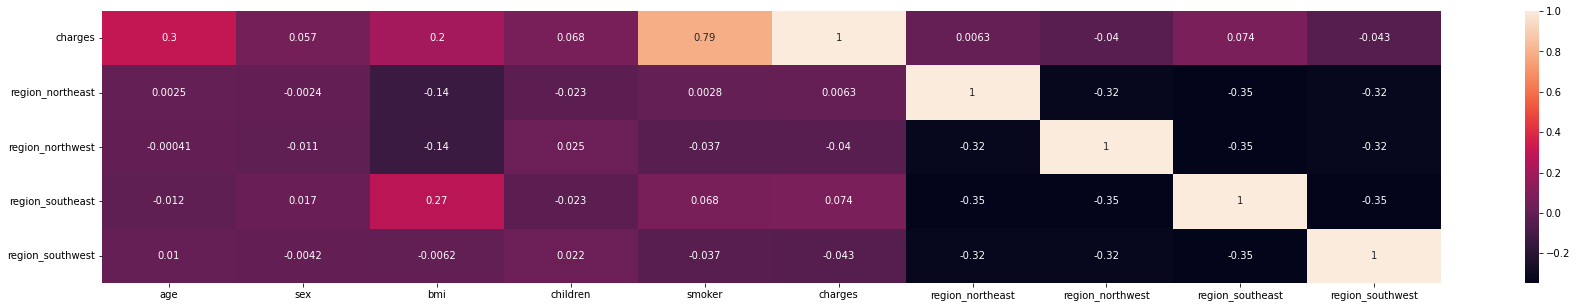

In [53]:
plt.figure(figsize=(30,5))
corr=df.corr()[5::]
sns.heatmap(corr,annot=True)

In [54]:
# no multicoliNEARITY

SyntaxError: invalid syntax (4292409258.py, line 1)

<AxesSubplot:>

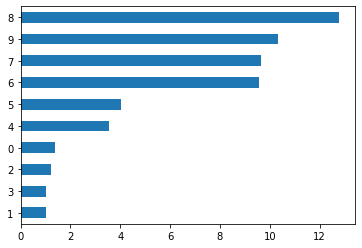

In [55]:
VIF=[]
# df=df.drop(["charges"],axis=1)
for i in range(df.shape[1]):
    v=variance_inflation_factor(df.to_numpy(),i)
    VIF.append(v)
s1=pd.Series(VIF)
s1.sort_values().plot(kind="barh")

In [57]:
# train model 

In [58]:
x=df.drop(["charges"],axis=1)
y=df["charges"]

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [60]:
x_test

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
985,44,0,25.80,1,0,0,0,0,1
348,36,0,29.92,1,0,0,0,1,0
679,49,0,23.18,2,0,0,1,0,0
604,19,0,28.31,0,1,0,1,0,0
677,60,1,31.35,3,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
550,63,1,30.80,0,0,0,0,0,1
1142,52,0,24.86,0,0,0,0,1,0
469,18,0,24.09,1,0,0,0,1,0
635,64,1,38.19,0,0,1,0,0,0


In [61]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [62]:
model.coef_## this m slope

array([  270.54286061,  -135.8490394 ,   330.16202412,   415.06574534,
       24296.28565783,   353.17621124,   149.6796418 ,  -411.81850359,
         -91.03734944])

In [63]:
model.intercept_## this value of y_intercept

-12923.387123940412

In [66]:
# engineering feature on test data

In [67]:
y_pre=model.predict(x_test)
y_pre

array([ 7822.70736121,  6697.85086156,  8966.17989764, 26009.77943022,
       39215.07746521,  1281.69392585, 27091.95087266,  5842.24151839,
       10190.23393836,  1812.50967442, 12656.87601262,  7212.58725151,
        6558.32020358, 11097.62996893,   901.36591488,  3445.83430827,
        2833.22943925,  9845.32519276, 29776.89542026,  8112.35456445,
        4766.95813154,  9766.17337906, 12990.98610437,  7668.32232691,
       31154.17566557, 34662.96233165,  5108.98127574,  5843.06937352,
        1798.31878164, 11740.24203045, 29846.41164927, 17057.24399271,
        6775.57062124,  1569.45760865,  7172.26217882,  8075.38320323,
        8411.13186163,  6910.67899861,  4012.88936242,  9581.48043995,
        6424.93699054, 15789.02187081,  7849.75744182,  6670.1120683 ,
       10724.24540039,  3721.92400676,  5333.32098253,  7374.6440305 ,
        2169.22865288, 10565.44979258,  6983.40294442, 15931.59651956,
        3599.41524478,  9492.23321501, 12598.60795771,  7976.01880406,
      

In [68]:
mae=mean_absolute_error(y_test,y_pre)
print("mae==",mae)

mae== 4417.526091523953


In [69]:
mse=mean_squared_error(y_test,y_pre)
print("mse==",mse)

mse== 45524442.237952605


In [70]:
rmse=np.sqrt(mse)
print("rmse==",mse)

rmse== 45524442.237952605


In [71]:
r2=r2_score(y_test,y_pre)
print(r2)

0.6583498155923184


In [72]:
y_pre=model.predict(x_train)
y_pre

array([ 7880.48829344, 33341.61342089, 37301.61342266, ...,
        8772.45768807, 12617.62497727,  3192.71477231])

In [73]:
mae=mean_absolute_error(y_train,y_pre)
print("mae==",mae)


mae== 4036.171051454685


In [74]:
mse=mean_squared_error(y_train,y_pre)
print("mae==",mse)

mae== 34387766.890877485


In [75]:
rmse=np.sqrt(mse)
print("rmse==",mse)

rmse== 34387766.890877485


In [76]:
r2=r2_score(y_train,y_pre)
print(r2)

0.7705414555400971


In [77]:
df.head(1).T

,0
age,19.000
sex,0.000
bmi,27.900
children,0.000
smoker,1.000
charges,16884.924
region_northeast,0.000
region_northwest,0.000
region_southeast,0.000
region_southwest,1.000


In [78]:
age=25
sex="male"
bim=27.9
children=5
smoker="no"
region_southwest="southwest"

In [79]:
project_data={"sex":{"male":1,"female":0},
             "smoker":{"yes":1,"no":0},
              "colums":list(x.columns)
             }

In [80]:
column_names=x.columns
region="region_"+"southwest"
region_index=np.where(column_names==region)[0][0]
region_index

8

In [81]:
array=np.zeros(x.columns.shape[0],dtype=int)
array[0]=1
array[1]=project_data["sex"][sex]
array[2]=bim
array[3]=children
array[4]=project_data["smoker"][smoker]
array[region_index]=1
array

array([ 1,  1, 27,  5,  0,  0,  0,  0,  1])

In [82]:
array.shape

(9,)

In [83]:
model.predict([array])


C:\Users\Prashant Dahake\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-1890.02727413])

In [84]:
import pickle 
import json

In [85]:
with open ("model.pkl","wb") as f:
    pickle.dump(model,f)
    
with open ("project_data.json","w") as f:
    json.dump(project_data,f)


In [86]:
with open ("model.pkl","rb") as f:
    pickle.load(f)

In [87]:
with open("project_data.json","r") as f:
    p=json.load(f)
    p

In [92]:
import numpy as np
import pandas as pd
import pickle
import json

class medical_insurance():
    def __init__(self,age,sex,bim,children,smoker,region):
        self.age=age
        self.sex=sex
        self.bim=bim
        self.children=children
        self.smoker=smoker
        self.region="region_"+ region
    def load_mode(self):
        with open ("model.pkl","rb") as f:
            self.model1=pickle.load(f)

        with open("project_data.json","r")as f:
            self.json_data=json.load(f)
    def prediction(self):
        self.load_mode()
        region_index=self.json_data["colums"].index(self.region)

        array=np.zeros(len(self.json_data["colums"]))
        array[0]=self.age
        array[1]=self.json_data['sex'][self.sex]
        array[2]=self.bim
        array[3]=self.children
        array[4]=self.json_data["smoker"][self.smoker]
        array[region_index]=1
        print("test data",array)
        price=self.model1.predict([array])[0]
        print("price is ",price)
        return price
# if __name__=="__main__":
age=56
sex='male'
bmi=27.9
children=4
smoker='no'
region='northeast'
med_ins=medical_insurance(age, sex, bmi, children, smoker,region)

med_ins.prediction()






test data [56.   1.  27.9  4.   0.   1.   0.   0.   0. ]
price is  13316.12369650016


C:\Users\Prashant Dahake\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


13316.12369650016

In [88]:
# import numpy as np
# import pandas as pd
# import pickle
# import json

# class medical_insurance():
#     def __init__(self,age,sex,bim,children,smoker,region):
#         self.age=age
#         self.sex=sex
#         self.bim=bim
#         self.children=children
#         self.smoker=smoker
#         self.region="region_"+region
#     def load_mode(self):
#         with open ("model.pkl","rb") as f:
#             self.model1=pickle.load(f)

#         with open("project_data.json","r")as f:
#             self.json_data=json.load(f)
#     def prediction(self):
#         self.load_mode()
#         region_index=self.json_data["colums"].index(self.region)

#         array=np.zeros(len(self.json_data["colums"]))
#         array[0]=self.age
#         array[1]=self.json_data['sex'][self.sex]
#         array[2]=self.bim
#         array[3]=self.children
#         array[4]=self.json_data["smoker"][self.smoker]
#         array[region_index]=1
#         print("test data",array)
#         price=self.model1.predict([array])
#         print("price is ",price)
#         return price
# # if __name__=="__main__":
# age=56
# sex='male'
# bmi=27.9
# children=4
# smoker='no'
# region='northeast'
# med_ins=medical_insurance(age, sex, bmi, children, smoker,region)

# med_ins.prediction()





In [90]:
# import numpy as np
# import pickle
# import json
# #import config

# class MedicalInsurance():
#     def __init__(self,age, sex, bmi, children, smoker, region):
#         self.age=age
#         self.sex=sex
#         self.bmi=bmi
#         self.children=children
#         self.smoker=smoker
#         self.region='region_'+region

#     def load_model(self):
#         with open('model.pkl','rb') as f:
#             self.model=pickle.load(f)

        
#         with open("project_data.json",'r') as f:
#             self.json_data=json.load(f)

#     def get_predicted_charges(self):
#         self.load_model()
#         region_index=self.json_data['colums'].index(self.region)

#         test_array=np.zeros(len(self.json_data['colums']))
#         test_array[0]=self.age
#         test_array[1]=self.json_data['sex'][self.sex]
#         test_array[2]=self.bmi
#         test_array[3]=self.children
#         test_array[4]=self.json_data['smoker'][self.smoker]
#         test_array[region_index]=1

#         print("Test Array: ",test_array)
#         predicted_charges=self.model.predict([test_array])
#         print(predicted_charges)
#         return predicted_charges

# if __name__=="__main__":
#     age=56
#     sex='male'
#     bmi=27.9
#     children= 4
#     smoker='no'
#     region='northeast'
#     med_ins=MedicalInsurance(age, sex, bmi, children, smoker,region)
#     med_ins.get_predicted_charges()